In [1]:
# Custom classes
from src import sql_connector as sql
from src import titan_class as titan

In [2]:
# Establishing conection
database = sql.MySQL_manager(path='C:\\Users\\Diomedes\\Documents\\Python\\Mi_Git\\Data_Analisys\\templates\\src\\settings.json')
database.read_config()
database.CREATE_a_MySQL_db()

Connected to MySQL server australia_fires


(<pymysql.connections.Connection at 0x17907550a30>,
 <pymysql.cursors.Cursor at 0x17907550640>)

In [3]:
table_dict = database.ORDER_show_tables()

0: fire_archive_M6_96619
1: fire_archive_V1_96617
2: fire_nrt_M6_96619
3: fire_nrt_V1_96617
4: student_findings


In [4]:
for e in table_dict:
    database.ORDER_describe_table(table=table_dict[e])
    print('\n', ' + ' * 20, '\n')

          name      data_type nullable primary_key default_value collation
0      fire_id   mediumint(9)      YES                      None          
1     latitude    varchar(10)       NO                      None          
2    longitude  decimal(20,6)       NO                      None          
3   brightness  decimal(20,6)       NO                      None          
4         scan  decimal(20,6)       NO                      None          
5        track  decimal(20,6)       NO                      None          
6     acq_date           date       NO                      None          
7     acq_time    smallint(6)      YES                      None          
8    satellite    varchar(10)       NO                      None          
9   instrument    varchar(10)       NO                      None          
10  confidence     tinyint(4)      YES                      None          
11     version  decimal(20,6)       NO                      None          
12  bright_t31  decimal(2

In [5]:
query = f"""SELECT latitude, longitude, brightness, acq_date, satellite, confidence, frp, fire_type FROM {table_dict[0]}"""
name = 'some_data_australia_fires'


database.ORDER_create_a_df_from_sql(query= query, store= True, name= name)

The file will be stored as "some_data_australia_fires"  in Output/...


,latitude,longitude,brightness,acq_date,satellite,confidence,frp,fire_type
0,-11.807,142.0583,313.0,2019-08-01,Terra,48,6.6,0
1,-11.7924,142.0850,319.3,2019-08-01,Terra,71,11.3,0
2,-12.8398,132.8744,311.6,2019-08-01,Terra,42,23.1,0
3,-14.4306,143.3035,310.1,2019-08-01,Terra,33,6.5,0
4,-12.4953,131.4897,310.3,2019-08-01,Terra,36,27.6,0
...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,2019-09-30,Aqua,85,14.2,0
36007,-28.2625,128.5494,304.9,2019-09-30,Aqua,27,6.4,0
36008,-28.2941,128.5123,301.7,2019-09-30,Aqua,43,5.5,0
36009,-28.3001,128.5530,303.6,2019-09-30,Aqua,41,5.7,0


In [6]:
database.ORDER_close()

Closing connection connection with MySQL server...


In [7]:
fires = titan.Titan(path='C:\\Users\\Diomedes\\Documents\\Python\\Mi_Git\\Data_Analisys\\templates\\Output\\some_data_australia_fires.csv')

In [8]:
fires.create_df()
fires.general_info();

		General info on the df:
Shape
     Shape       
0     Rows  36011
1  Columns      9
------------------ 

Data type and NaNs
      Columns Data type  NaNs in column  Percentage of NaNs
0  Unnamed: 0     int64               0                 0.0
1    latitude   float64               0                 0.0
2   longitude   float64               0                 0.0
3  brightness   float64               0                 0.0
4    acq_date    object               0                 0.0
5   satellite    object               0                 0.0
6  confidence     int64               0                 0.0
7         frp   float64               0                 0.0
8   fire_type     int64               0                 0.0


In [9]:
my_frame = fires.return_df()

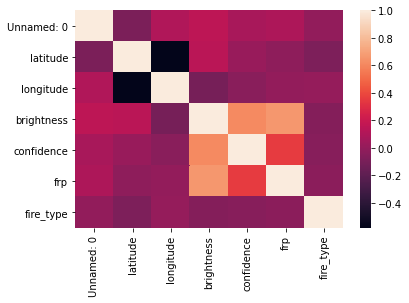

In [10]:
fires.correlation_plot()

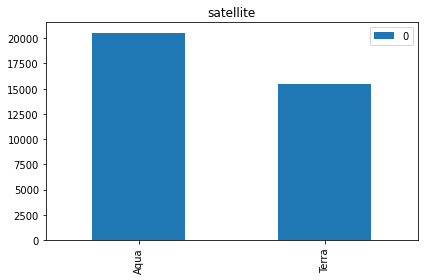

In [11]:
fires.quick_plotter(column='satellite')

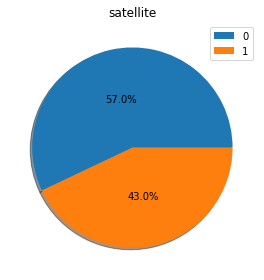

In [12]:
fires.quick_plotter(column='satellite', kind='pie')

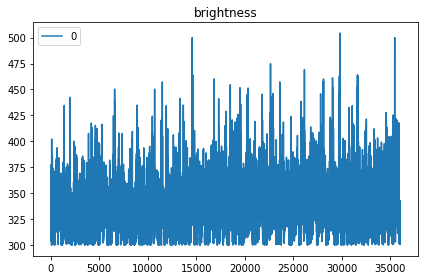

In [13]:
fires.quick_plotter(column= 'brightness',kind='line')